In [1]:
# Add Matplotlib inline magic
%matplotlib inline
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Files to load
city_data_to_load = os.path.join('Resources' , 'city_data.csv')
ride_data_to_load = os.path.join('Resources' , 'ride_data.csv')
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
# Count Null Columns
city_data_df.isnull().sum()
ride_data_df.isnull().sum()
#zero nulls in all columns both sheets

#determine data types
city_data_df.dtypes
ride_data_df.dtypes

# count city numbers
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
# Count Urban Cities
sum(city_data_df['type'] == 'Rural')

18

In [5]:
pyber_data_df = pd.merge(ride_data_df , city_data_df , how='left' , on = ['city' , 'city'])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [6]:
# Create each city type DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [7]:
# Get ride count per city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [8]:
# Get avergae fare per city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [9]:
# Get driver count for each city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

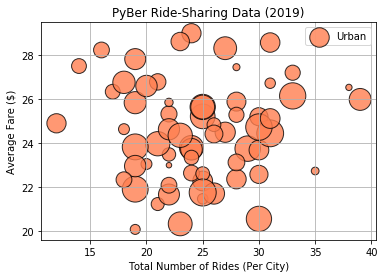

In [22]:
# Create Urban Plot
plt.scatter(urban_ride_count , 
            urban_avg_fare , 
            s=[i * 10 for i in urban_driver_count] , 
            label='Urban' , 
            color='coral' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

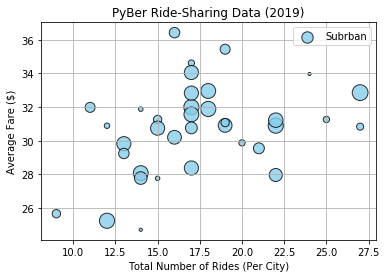

In [23]:
# Create suburban Plot
plt.scatter(suburban_ride_count , 
            suburban_avg_fare , 
            s=[i * 10 for i in suburban_driver_count] , 
            label='Subrban' , 
            color='skyblue' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

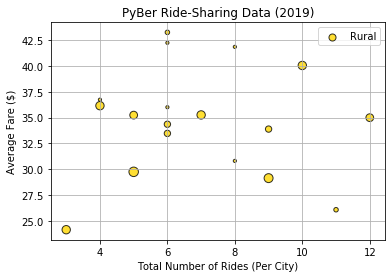

In [25]:
# Create Rural Plot
plt.scatter(rural_ride_count , 
            rural_avg_fare , 
            s=[i * 10 for i in rural_driver_count] , 
            label='Rural' , 
            color='gold' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'Analysis\\Fig1.png'

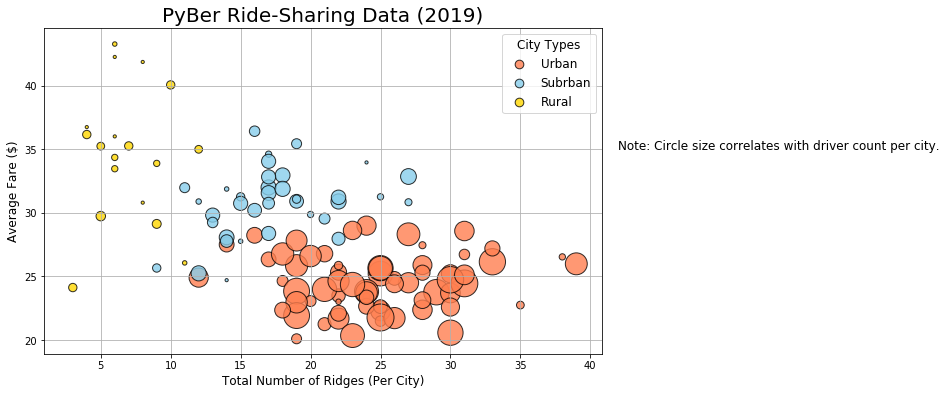

In [35]:
# Combine plots
plt.subplots(figsize = (10, 6))

#Urban
plt.scatter(urban_ride_count , 
            urban_avg_fare , 
            s=[i * 10 for i in urban_driver_count] , 
            label='Urban' , 
            color='coral' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)

# Suburban
plt.scatter(suburban_ride_count , 
            suburban_avg_fare , 
            s=[i * 10 for i in suburban_driver_count] , 
            label='Subrban' , 
            color='skyblue' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)

# Rural
plt.scatter(rural_ride_count , 
            rural_avg_fare , 
            s=[i * 10 for i in rural_driver_count] , 
            label='Rural' , 
            color='gold' , 
            edgecolor='black' ,
            linewidth = 1,
            alpha =.8)

# Other graph properties
plt.title('PyBer Ride-Sharing Data (2019)' , fontsize=20)
plt.ylabel('Average Fare ($)' , fontsize = 12)
plt.xlabel('Total Number of Ridges (Per City)' , fontsize = 12)
plt.grid(True)


# Add in legend
lgnd = plt.legend(fontsize=12 , mode='Expanded' , scatterpoints=1, loc='best' , title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label about circle size
plt.text(42, 35 , 'Note: Circle size correlates with driver count per city.' , fontsize=12)

# Save the figure
plt.savefig('Analysis\Fig1.png')

# Show
plt.show()